In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [3]:
from WindPy import w

w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [5]:
"""
此模型仅需改以下3个日期，确保为【工作日】！！！
end_date:本季度末
last_q_date ：上季度末
last_y_date：上年末

"""

end_date = "20250331"
last_q_date = "20241231"
last_y_date = "20240329"

# 1 宏观经济动态

## 1-1 货币供应量

### 1-1-1 M1:同比 M2:同比 社会融资规模:当月值 社会融资规模存量:同比


In [10]:
data1 = w.edb("M0001383,M0001385,M5206730,M5525763", "19850101", end_date,"ShowBlank=0")
data1

.ErrorCode=0
.Codes=[M0001383,M0001385,M5206730,M5525763]
.Fields=[CLOSE]
.Times=[19861231,19871231,19881231,19891231,19901231,19911231,19921231,19931231,19941231,19951231,...]
.Data=[[26.7,16.9,21.0,6.6,19.2,24.2,35.9,38.8,26.2,16.8,...],[29.3,24.0,21.2,18.3,28.0,26.5,31.3,37.3,34.5,29.5,...],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...]]

In [11]:
# 创建DataFrame
df1 = pd.DataFrame(
    data=data1.Data,
    index=data1.Codes,
    columns=pd.to_datetime([str(t) for t in data1.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M0001383': 'M1:同比',
    'M0001385': 'M2:同比',
    'M5206730': '社会融资规模:当月值',
    'M5525763': '社会融资规模存量:同比'
}
df1 = df1.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df1.reset_index(inplace=True)
df1.rename(columns={'index': '日期'}, inplace=True)
df1['日期'] = df1['日期'].dt.strftime('%Y-%m')  # 只保留年月

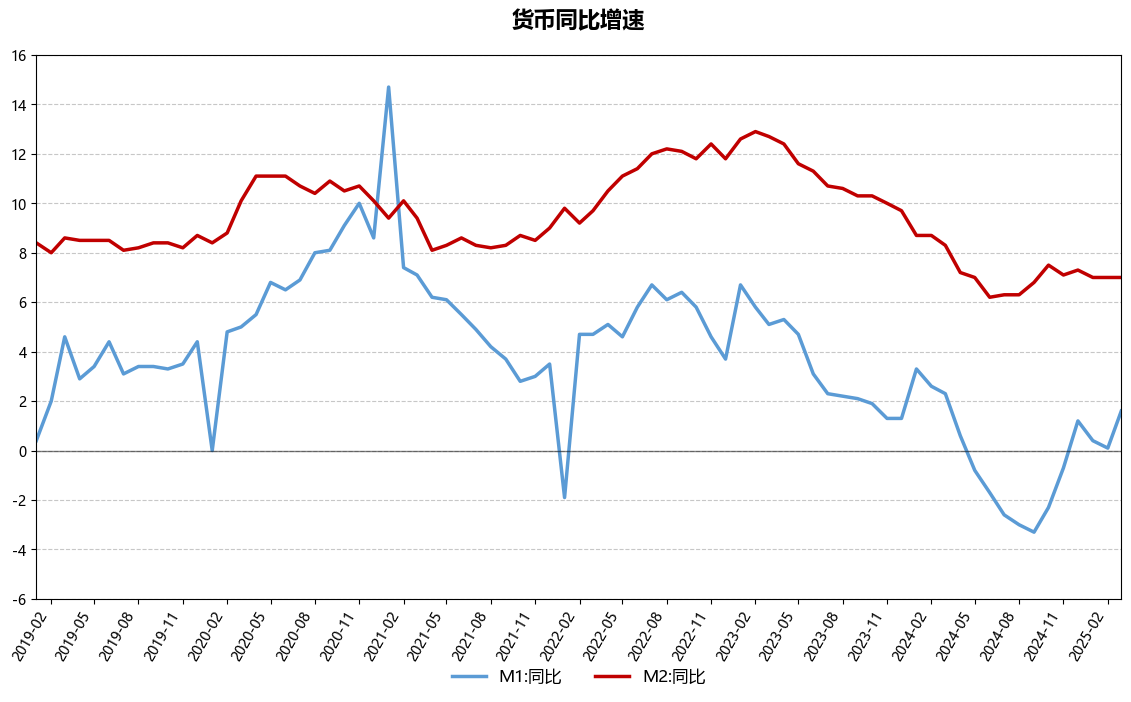

In [14]:
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 筛选2019年1月及之后的数据
df1['日期'] = pd.to_datetime(df1['日期'])  # 先将日期转换为datetime类型
df_filtered = df1[df1['日期'] >= '2019-01-01']

# 创建图形和坐标轴
plt.figure(figsize=(14, 8))

# 定义颜色
m1_color = '#5B9BD5'  # 指定的蓝色
m2_color = '#C00000'  # 指定的红色

# 绘制M1:同比折线 - 使用指定的蓝色
plt.plot(df_filtered['日期'], df_filtered['M1:同比'], 
         label='M1:同比', 
         color=m1_color,
         linewidth=2.5)

# 绘制M2:同比折线 - 使用指定的红色
plt.plot(df_filtered['日期'], df_filtered['M2:同比'], 
         label='M2:同比', 
         color=m2_color,  # 使用指定的红色
         linewidth=2.5)

# 设置标题
plt.title('货币同比增速', fontsize=16, fontweight='bold', pad=20)

# 去除X轴和Y轴名称
plt.xlabel('')
plt.ylabel('')

# 添加图例在正下方
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fontsize=12, frameon=False)

# 优化X轴日期显示
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式为年-月
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每3个月显示一个刻度

# 旋转X轴标签60度
plt.xticks(rotation=60, ha='right')

# 设置Y轴范围和刻度
plt.ylim(-6, 16)
plt.yticks(range(-6, 17, 2))

# 添加横向网格线（只保留横线）
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 设置X轴范围
plt.xlim(pd.Timestamp('2019-01-01'), df_filtered['日期'].max())

# 添加水平零线
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 调整布局确保图例可见
plt.subplots_adjust(bottom=0.2)

# 显示图形
plt.show()

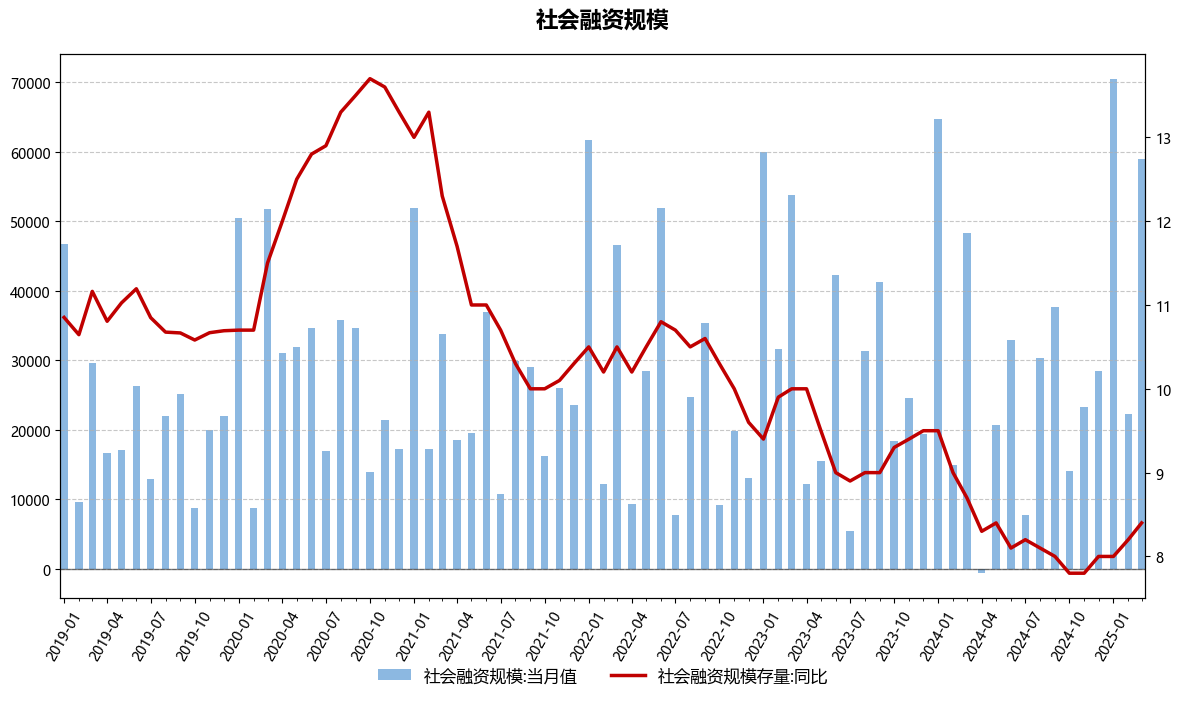

In [16]:
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 筛选2019年1月及之后的数据
df1['日期'] = pd.to_datetime(df1['日期'])  # 先将日期转换为datetime类型
df_filtered = df1[df1['日期'] >= '2019-01-01']

# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(14, 8))

# 定义颜色
bar_color = '#5B9BD5'  # 柱状图颜色（蓝色）
line_color = '#C00000'  # 折线图颜色（红色）

# 计算柱状图宽度（基于日期间隔）
date_diff = (df_filtered['日期'].iloc[1] - df_filtered['日期'].iloc[0]).days
bar_width = date_diff * 0.5  # 宽度为日期间隔的70%

# 绘制柱状图（社会融资规模:当月值）
# 使用日期作为X轴位置
ax1.bar(df_filtered['日期'], df_filtered['社会融资规模:当月值'], 
        width=bar_width, 
        color=bar_color, 
        alpha=0.7,
        label='社会融资规模:当月值')

# 设置左侧Y轴（柱状图）
ax1.set_ylabel('', fontsize=12)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(False)  # 关闭左侧Y轴网格线

# 创建右侧Y轴（折线图）
ax2 = ax1.twinx()

# 绘制折线图（社会融资规模存量:同比）
ax2.plot(df_filtered['日期'], df_filtered['社会融资规模存量:同比'], 
         label='社会融资规模存量:同比', 
         color=line_color, 
         linewidth=2.5)

# 设置右侧Y轴
ax2.set_ylabel('', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)

# 设置标题
plt.title('社会融资规模', fontsize=16, fontweight='bold', pad=20)

# 优化X轴日期显示
# 设置日期格式化
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# 设置刻度位置 - 解决最左最右柱子显示不全的问题
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# 设置次刻度位置 - 确保每个月都有位置标记
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

# 设置X轴标签旋转60度，右对齐
ax1.tick_params(axis='x', rotation=60)

# 设置X轴范围 - 关键修复：增加缓冲区确保柱子完整显示
# 计算缓冲区（柱宽的一半）
buffer = pd.Timedelta(days=bar_width/2)
x_min = df_filtered['日期'].min() - buffer
x_max = df_filtered['日期'].max() + buffer
ax1.set_xlim(x_min, x_max)

# 添加横向网格线（只保留横线）
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# 添加水平零线
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 合并图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.1), 
          ncol=2, 
          fontsize=12, 
          frameon=False)

# 调整布局确保图例可见
plt.subplots_adjust(bottom=0.2)

# 显示图形
plt.show()

### 1-1-2 中国:M2

In [19]:
data2 = w.edb("M0001384", "19850101", end_date,"ShowBlank=0")
data2

.ErrorCode=0
.Codes=[M0001384]
.Fields=[CLOSE]
.Times=[19851231,19861231,19871231,19881231,19891231,19901231,19911231,19921231,19931231,19941231,...]
.Data=[[5198.9,6720.900000000001,8330.9,10099.8,11949.6,15293.400000000001,19349.9,25402.2,34879.8,46923.5,...]]

In [21]:
# 创建DataFrame
df2 = pd.DataFrame(
    data=data2.Data,
    index=data2.Codes,
    columns=pd.to_datetime([str(t) for t in data2.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M0001384': '中国:M2'
}
df2 = df2.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df2.reset_index(inplace=True)
df2.rename(columns={'index': '日期'}, inplace=True)
df2['日期'] = df2['日期'].dt.strftime('%Y-%m')  # 只保留年月

### 1-1-3 中国:社会融资规模:累计值

In [24]:
data3 = w.edb("M5201630", "19850101", end_date,"ShowBlank=0")
data3

.ErrorCode=0
.Codes=[M5201630]
.Fields=[CLOSE]
.Times=[20020131,20020228,20020331,20020430,20020531,20020630,20020731,20020831,20020930,20021031,...]
.Data=[[-472.0,-183.0,2953.0,4104.0,5878.0,8499.0,9312.0,10897.0,14404.0,15199.0,...]]

In [26]:
# 创建DataFrame
df3 = pd.DataFrame(
    data=data3.Data,
    index=data3.Codes,
    columns=pd.to_datetime([str(t) for t in data3.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M5201630': '中国:社会融资规模:累计值',
}
df3 = df3.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df3.reset_index(inplace=True)
df3.rename(columns={'index': '日期'}, inplace=True)
df3['日期'] = df3['日期'].dt.strftime('%Y-%m')  # 只保留年月

## 1-2 GDP

### 1-2-1 中国:GDP:现价:当季值	中国:GDP:环比:季调


In [30]:
data4 = w.edb("M5567876,M0061567", "19850101", end_date,"ShowBlank=0")
data4

.ErrorCode=0
.Codes=[M5567876,M0061567]
.Fields=[CLOSE]
.Times=[19920331,19920630,19920930,19921231,19930331,19930630,19930930,19931231,19940331,19940630,...]
.Data=[[5284.9,6507.9,7218.4,8284.4,6866.3,8390.4,9423.1,11139.9,9424.1,11532.7,...],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...]]

In [32]:
# 创建DataFrame
df4 = pd.DataFrame(
    data=data4.Data,
    index=data4.Codes,
    columns=pd.to_datetime([str(t) for t in data4.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M5567876': '中国:GDP:现价:当季值',
    'M0061567': '中国:GDP:环比:季调'
}
df4 = df4.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df4.reset_index(inplace=True)
df4.rename(columns={'index': '日期'}, inplace=True)
df4['日期'] = df4['日期'].dt.strftime('%Y-%m')  # 只保留年月

### 1-2-2 中国:GDP:现价:累计同比


In [35]:
data5 = w.edb("M6347627", "20020331", end_date,"ShowBlank=0")
data5

.ErrorCode=0
.Codes=[M6347627]
.Fields=[CLOSE]
.Times=[20020331,20020630,20020930,20021231,20030331,20030630,20030930,20031231,20040331,20040630,...]
.Data=[[5.66,6.04,6.63,6.74,12.09,9.92,10.37,13.96,15.04,17.42,...]]

In [37]:
# 创建DataFrame
df5 = pd.DataFrame(
    data=data5.Data,
    index=data5.Codes,
    columns=pd.to_datetime([str(t) for t in data5.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M6347627': '中国:GDP:现价:累计同比'
}
df5 = df5.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df5.reset_index(inplace=True)
df5.rename(columns={'index': '日期'}, inplace=True)
df5['日期'] = df5['日期'].dt.strftime('%Y-%m')  # 只保留年月

### 1-2-3 中国:GDP:现价:当季同比

In [40]:
data6 = w.edb("M6637815", "19850101", end_date,"ShowBlank=0")
data6

.ErrorCode=0
.Codes=[M6637815]
.Fields=[CLOSE]
.Times=[20160930,20161231,20170331,20170630,20170930,20171231,20180331,20180630,20180930,20181231,...]
.Data=[[9.07,11.57,13.98,11.6,11.86,11.03,10.02,9.65,9.51,8.11,...]]

In [42]:
# 创建DataFrame
df6 = pd.DataFrame(
    data=data6.Data,
    index=data6.Codes,
    columns=pd.to_datetime([str(t) for t in data6.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M6637815': '中国:GDP:现价:当季同比'
}
df6 = df6.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df6.reset_index(inplace=True)
df6.rename(columns={'index': '日期'}, inplace=True)
df6['日期'] = df6['日期'].dt.strftime('%Y-%m')  # 只保留年月

### 1-2-4 中国:GDP:现价:累计值

In [45]:
data7 = w.edb("M0000001", "19521231", end_date,"ShowBlank=0")
data7

.ErrorCode=0
.Codes=[M0000001]
.Fields=[CLOSE]
.Times=[19521231,19531231,19541231,19551231,19561231,19571231,19581231,19591231,19601231,19611231,...]
.Data=[[680.2,825.9,861.2,913.1,1032.6,1073.5,1314.9,1450.5,1473.3,1234.9,...]]

In [47]:
# 创建DataFrame
df7 = pd.DataFrame(
    data=data7.Data,
    index=data7.Codes,
    columns=pd.to_datetime([str(t) for t in data7.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M0000001': '中国:GDP:现价:累计值'
}
df7 = df7.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
df7.reset_index(inplace=True)
df7.rename(columns={'index': '日期'}, inplace=True)
df7['日期'] = df7['日期'].dt.strftime('%Y-%m')  # 只保留年月

In [49]:
# 输出为excel
with pd.ExcelWriter("货币供应量（月）.xlsx") as writer:
    df1.to_excel(writer, sheet_name='货币供应量-M1M2同比', index=False)
    df2.to_excel(writer, sheet_name='货币供应量-M2', index=False)
    df3.to_excel(writer, sheet_name='货币供应量-社融累计值', index=False)
    df4.to_excel(writer, sheet_name='GDP-1', index=False)
    df5.to_excel(writer, sheet_name='GDP-2', index=False)
    df6.to_excel(writer, sheet_name='GDP-3', index=False)
    df7.to_excel(writer, sheet_name='GDP-4', index=False)

In [50]:
end_date1 = pd.to_datetime(end_date, format='%Y%m%d').strftime('%Y-%m')
target_data1 = df1[df1['日期'] == end_date1]
m1_growth = target_data1['M1:同比'].values[0]
m2_growth = target_data1['M2:同比'].values[0]
print(f"{end_date1}的M1同比增长: {m1_growth}%")
print(f"{end_date1}的M2同比增长: {m2_growth}%")

target_data2 = df3[df3['日期'] == end_date1]
so_fi1 = target_data2['中国:社会融资规模:累计值'].values[0]/10000
formatted_so_fi1 = format(so_fi1, ".2f")
print(f"{end_date1}的社会融资规模增量:{formatted_so_fi1}万亿元")
so_fi2 = target_data1['社会融资规模存量:同比'].values[0]
print(f"{end_date1}的社融存量同比增长: {so_fi2}%")

2025-03的M1同比增长: 1.6%
2025-03的M2同比增长: 7.0%
2025-03的社会融资规模增量:15.18万亿元
2025-03的社融存量同比增长: 8.4%


# 2 金融市场动态

## 2-1 无风险收益率

### 2-1-1 无风险收益率5、10年期国债到期收益率-画图

In [56]:
fdata1 = w.edb("M1001650,M1001654", "20180101", end_date,"ShowBlank=0")
fdata1

.ErrorCode=0
.Codes=[M1001650,M1001654]
.Fields=[CLOSE]
.Times=[20180102,20180103,20180104,20180105,20180108,20180109,20180110,20180111,20180112,20180115,...]
.Data=[[3.8356,3.8331,3.8715,3.8438,3.8415,3.8317,3.83,3.8689,3.8516,3.8753,...],[3.9035,3.9182,3.9282,3.926,3.9099,3.8926,3.9194,3.9569,3.9321,3.9645,...]]

In [58]:
# 创建DataFrame
fdf1 = pd.DataFrame(
    data=fdata1.Data,
    index=fdata1.Codes,
    columns=pd.to_datetime([str(t) for t in fdata1.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M1001650': '中国:国债到期收益率:5年',
    'M1001654': '中国:国债到期收益率:10年'
}
fdf1 = fdf1.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
fdf1 = fdf1.reset_index().rename(columns={'index': '日期'})
fdf1['日期'] = fdf1['日期'].dt.strftime('%Y-%m-%d')

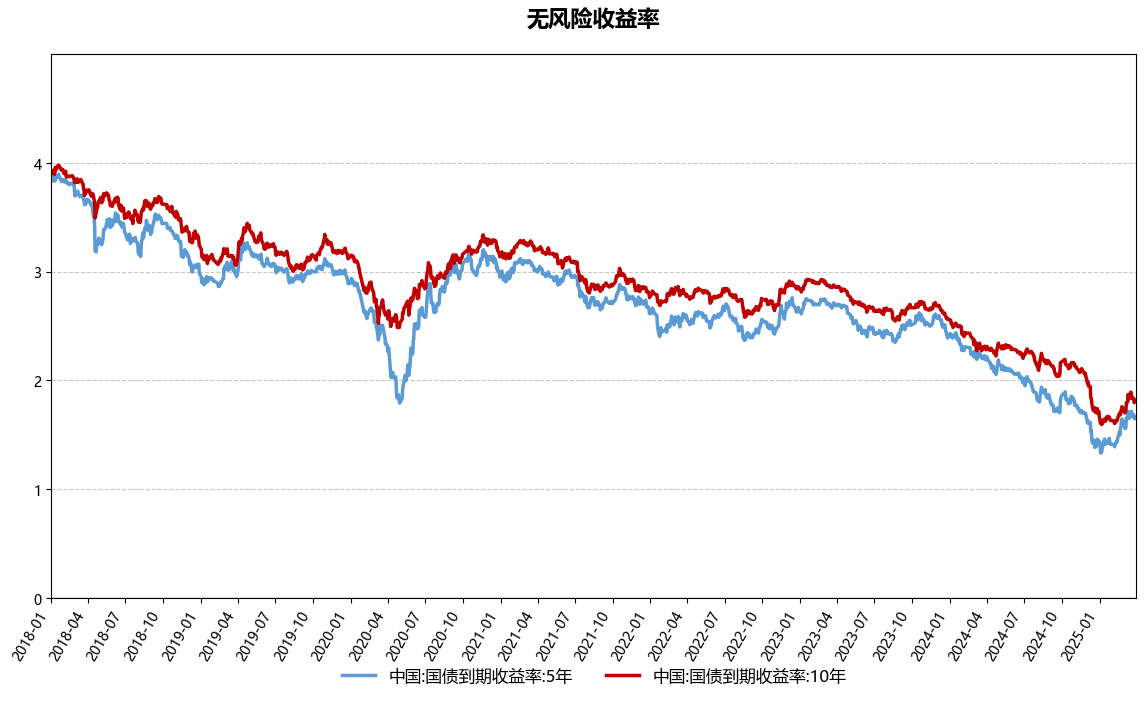

In [60]:
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 筛选2018年1月及之后的数据
fdf1['日期'] = pd.to_datetime(fdf1['日期'])  # 先将日期转换为datetime类型
df_filtered = fdf1[fdf1['日期'] >= '2018-01-01']

# 创建图形和坐标轴
plt.figure(figsize=(14, 8))

# 定义颜色
m1_color = '#5B9BD5'  # 指定的蓝色
m2_color = '#C00000'  # 指定的红色

# 绘制rf5- 使用指定的蓝色
plt.plot(df_filtered['日期'], df_filtered['中国:国债到期收益率:5年'], 
         label='中国:国债到期收益率:5年', 
         color=m1_color,
         linewidth=2.5)

# 绘制rf10 - 使用指定的红色
plt.plot(df_filtered['日期'], df_filtered['中国:国债到期收益率:10年'], 
         label='中国:国债到期收益率:10年', 
         color=m2_color,  # 使用指定的红色
         linewidth=2.5)

# 设置标题
plt.title('无风险收益率', fontsize=16, fontweight='bold', pad=20)

# 去除X轴和Y轴名称
plt.xlabel('')
plt.ylabel('')

# 添加图例在正下方
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fontsize=12, frameon=False)

# 优化X轴日期显示
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式为年-月
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每3个月显示一个刻度

# 旋转X轴标签60度
plt.xticks(rotation=60, ha='right')

# 设置Y轴范围和刻度
plt.ylim(0, 5)
plt.yticks(range(0, 5, 1))

# 添加横向网格线（只保留横线）
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 设置X轴范围
plt.xlim(pd.Timestamp('2018-01-01'), df_filtered['日期'].max())

# 添加水平零线
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 调整布局确保图例可见
plt.subplots_adjust(bottom=0.2)

# 显示图形
plt.show()

### 2-1-2 无风险收益率1、3、5、7、10年期国债到期收益率

In [63]:
fdata2 = w.edb("M1001646,M1001648,M1001650,M1001652,M1001654", "20180101", end_date,"ShowBlank=0")
fdata2

.ErrorCode=0
.Codes=[M1001646,M1001648,M1001650,M1001652,M1001654]
.Fields=[CLOSE]
.Times=[20180102,20180103,20180104,20180105,20180108,20180109,20180110,20180111,20180112,20180115,...]
.Data=[[3.6958,3.6691,3.6575,3.5537,3.5344,3.5374,3.5535,3.582,3.5563,3.5703,...],[3.7786,3.7452,3.7428,3.7275,3.6887,3.6607,3.6545,3.6917,3.6583,3.6863,...],[3.8356,3.8331,3.8715,3.8438,3.8415,3.8317,3.83,3.8689,3.8516,3.8753,...],[3.9109,3.9031,3.915,3.9067,3.9154,3.9021,3.8659,3.8735,3.898,3.9375,...],[3.9035,3.9182,3.9282,3.926,3.9099,3.8926,3.9194,3.9569,3.9321,3.9645,...]]

In [65]:
# 创建DataFrame
fdf2 = pd.DataFrame(
    data=fdata2.Data,
    index=fdata2.Codes,
    columns=pd.to_datetime([str(t) for t in fdata2.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M1001646': '中国:国债到期收益率:1年',
    'M1001648': '中国:国债到期收益率:3年',
    'M1001650': '中国:国债到期收益率:5年',
    'M1001652': '中国:国债到期收益率:7年',
    'M1001654': '中国:国债到期收益率:10年'
}
fdf2 = fdf2.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
fdf2.reset_index(inplace=True)
fdf2.rename(columns={'index': '日期'}, inplace=True)
fdf2['日期'] = fdf2['日期'].dt.strftime('%Y-%m-%d')

In [67]:
end_date2 = pd.to_datetime(end_date, format='%Y%m%d').strftime('%Y-%m-%d')
target_fdata = fdf2[fdf2['日期'] == end_date2]
rf1 = target_fdata['中国:国债到期收益率:1年'].values[0]
rf3 = target_fdata['中国:国债到期收益率:3年'].values[0]
rf5 = target_fdata['中国:国债到期收益率:5年'].values[0]
rf7 = target_fdata['中国:国债到期收益率:7年'].values[0]
rf10 = target_fdata['中国:国债到期收益率:10年'].values[0]

formatted_rf1 = format(rf1, ".2f")
formatted_rf3 = format(rf3, ".2f")
formatted_rf5 = format(rf5, ".2f")
formatted_rf7 = format(rf7, ".2f")
formatted_rf10 = format(rf10, ".2f")

print(f"{end_date2}的1年期国债到期收益率: {formatted_rf1}%")
print(f"{end_date2}的3年期国债到期收益率: {formatted_rf3}%")
print(f"{end_date2}的5年期国债到期收益率: {formatted_rf5}%")
print(f"{end_date2}的7年期国债到期收益率: {formatted_rf7}%")
print(f"{end_date2}的10年期国债到期收益率: {formatted_rf10}%")

2025-03-31的1年期国债到期收益率: 1.50%
2025-03-31的3年期国债到期收益率: 1.61%
2025-03-31的5年期国债到期收益率: 1.66%
2025-03-31的7年期国债到期收益率: 1.76%
2025-03-31的10年期国债到期收益率: 1.82%


In [69]:
last_q_date2 = pd.to_datetime(last_q_date, format='%Y%m%d').strftime('%Y-%m-%d')
last_target_fdata = fdf2[fdf2['日期'] == last_q_date2]

last_rf1 = last_target_fdata['中国:国债到期收益率:1年'].values[0]
last_rf3 = last_target_fdata['中国:国债到期收益率:3年'].values[0]
last_rf5 = last_target_fdata['中国:国债到期收益率:5年'].values[0]
last_rf7 = last_target_fdata['中国:国债到期收益率:7年'].values[0]
last_rf10 = last_target_fdata['中国:国债到期收益率:10年'].values[0]

sub_rf1 = (rf1-last_rf1)*100
sub_rf3 = (rf3-last_rf3)*100
sub_rf5 = (rf5-last_rf5)*100
sub_rf7 = (rf7-last_rf7)*100
sub_rf10 = (rf10-last_rf10)*100

formatted_sub_rf1 = format(sub_rf1, ".0f")
formatted_sub_rf3 = format(sub_rf3, ".0f")
formatted_sub_rf5 = format(sub_rf5, ".0f")
formatted_sub_rf7 = format(sub_rf7, ".0f")
formatted_sub_rf10 = format(sub_rf10, ".0f")

print(f"{end_date}的1年期国债到期收益率相较上季末上行: {formatted_sub_rf1}bps")
print(f"{end_date}的3年期国债到期收益率相较上季末上行: {formatted_sub_rf3}bps")
print(f"{end_date}的5年期国债到期收益率相较上季末上行: {formatted_sub_rf5}bps")
print(f"{end_date}的7年期国债到期收益率相较上季末上行: {formatted_sub_rf7}bps")
print(f"{end_date}的10年期国债到期收益率相较上季末上行: {formatted_sub_rf10}bps")

20250331的1年期国债到期收益率相较上季末上行: 39bps
20250331的3年期国债到期收益率相较上季末上行: 43bps
20250331的5年期国债到期收益率相较上季末上行: 25bps
20250331的7年期国债到期收益率相较上季末上行: 16bps
20250331的10年期国债到期收益率相较上季末上行: 15bps


## 2-2 国债总指数

In [72]:
fdata3 = w.edb("M0265807,M0265779", "2018-01-01", end_date,"ShowBlank=0")
fdata3

.ErrorCode=0
.Codes=[M0265807,M0265779]
.Fields=[CLOSE]
.Times=[20180102,20180103,20180104,20180105,20180108,20180109,20180110,20180111,20180112,20180115,...]
.Data=[[112.2352,112.2539,112.2307,112.3101,112.326,112.3542,112.2793,112.2161,112.232,112.1702,...],[118.2134,118.2153,118.1612,118.266,118.2009,118.2055,118.0687,117.9729,117.9946,117.8586,...]]

In [74]:
# 创建DataFrame
fdf3 = pd.DataFrame(
    data=fdata3.Data,
    index=fdata3.Codes,
    columns=pd.to_datetime([str(t) for t in fdata3.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M0265807': '中债新综合全价指数',
    'M0265779': '中债总全价指数'
}
fdf3 = fdf3.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
fdf3.reset_index(inplace=True)
fdf3.rename(columns={'index': '日期'}, inplace=True)
fdf3['日期'] = fdf3['日期'].dt.strftime('%Y-%m-%d')

In [76]:
target_fdata3 = fdf3[fdf3['日期'] == end_date2]
idx1 = target_fdata3['中债新综合全价指数'].values[0]
idx2 = target_fdata3['中债总全价指数'].values[0]

formatted_idx1 = format(idx1, ".2f")
formatted_idx2 = format(idx2, ".2f")

In [78]:
last_y_date2 = pd.to_datetime(last_y_date, format='%Y%m%d').strftime('%Y-%m-%d')
last_target_fdata3 = fdf3[fdf3['日期'] == last_y_date2]

last_idx1 = last_target_fdata3['中债新综合全价指数'].values[0]
last_idx2 = last_target_fdata3['中债总全价指数'].values[0]

sub_idx1 = idx1-last_idx1
sub_idx2 = idx2-last_idx2

formatted_sub_idx1 = format(sub_idx1, ".2f")
formatted_sub_idx2 = format(sub_idx2, ".2f")

print(f"{end_date}的中债国债总指数: {formatted_idx2}，较上年同期上涨了{formatted_sub_idx2}")
print(f"{end_date}的中债新综合全价指数: {formatted_idx1}，较上年同期上涨了{formatted_sub_idx1}")

20250331的中债国债总指数: 137.04，较上年同期上涨了3.47
20250331的中债新综合全价指数: 129.29，较上年同期上涨了2.97


## 2-3 20年期国债即期-画图

In [81]:
fdata4 = w.edb("M1001706", "20071217", end_date,"ShowBlank=0")
fdata4

.ErrorCode=0
.Codes=[M1001706]
.Fields=[CLOSE]
.Times=[20071217,20071218,20071219,20071220,20080204,20080221,20080222,20080225,20080226,20080227,...]
.Data=[[4.6742,4.7592,4.7182,4.8065,4.3877,4.355,4.3696,4.357,4.3619,4.3524,...]]

In [83]:
# 创建DataFrame
fdf4 = pd.DataFrame(
    data=fdata4.Data,
    index=fdata4.Codes,
    columns=pd.to_datetime([str(t) for t in fdata4.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M1001706': '国债即期收益率:20年',
}
fdf4 = fdf4.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
fdf4.reset_index(inplace=True)
fdf4.rename(columns={'index': '日期'}, inplace=True)
fdf4['日期'] = fdf4['日期'].dt.strftime('%Y-%m-%d')

In [85]:
# 计算750日均线并添加到fdf3右侧

# 步骤1：转换回datetime类型用于时间序列计算
fdf4['日期'] = pd.to_datetime(fdf4['日期'])

# 步骤2：设置日期为索引并按日期排序
fdf4.set_index('日期', inplace=True)
fdf4.sort_index(inplace=True)

# 步骤3：计算750日均线并保留4位小数
# 注意：使用min_periods=1确保即使数据不足750个点也有值
fdf4['750日均线'] = fdf4['国债即期收益率:20年'].rolling(window=750, min_periods=1).mean().round(4)

# 步骤4：重置索引使日期成为普通列
fdf4.reset_index(inplace=True)

# 步骤5：将日期转换回字符串格式（保持原有格式）
fdf4['日期'] = fdf4['日期'].dt.strftime('%Y-%m-%d')

# 查看后5个结果
print(fdf4.tail())

              日期  国债即期收益率:20年  750日均线
4086  2025-03-25       2.1854  2.7821
4087  2025-03-26       2.1451  2.7806
4088  2025-03-27       2.1534  2.7791
4089  2025-03-28       2.1842  2.7776
4090  2025-03-31       2.1801  2.7762


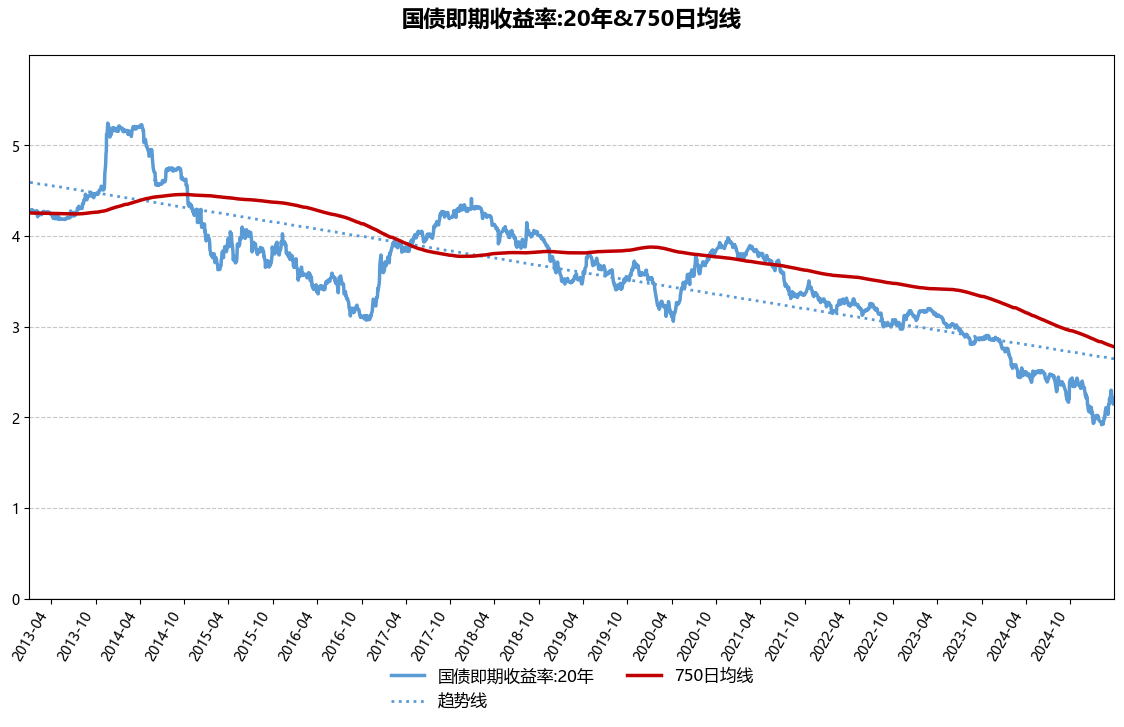

In [87]:
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 筛选2013年1月及之后的数据
fdf4['日期'] = pd.to_datetime(fdf4['日期'])  # 先将日期转换为datetime类型
df_filtered = fdf4[fdf4['日期'] >= '2013-01-01']

# 创建图形和坐标轴
plt.figure(figsize=(14, 8))

# 定义颜色
m1_color = '#5B9BD5'  # 指定的蓝色
m2_color = '#C00000'  # 指定的红色

# 绘制20年期国债收益率 - 使用指定的蓝色
plt.plot(df_filtered['日期'], df_filtered['国债即期收益率:20年'], 
         label='国债即期收益率:20年', 
         color=m1_color,
         linewidth=2.5)

# 拟合趋势线（蓝色虚线）
x_num = np.arange(len(df_filtered))  # 用整数索引作为x值
y_vals = df_filtered['国债即期收益率:20年'].astype(float)
coeffs = np.polyfit(x_num, y_vals, deg=1)  # 一次多项式拟合
trend_line = np.poly1d(coeffs)

plt.plot(df_filtered['日期'], trend_line(x_num), 
         linestyle=':', 
         color=m1_color, 
         linewidth=2,
         label='趋势线')

# 绘制750日均线 - 使用指定的红色
plt.plot(df_filtered['日期'], df_filtered['750日均线'], 
         label='750日均线', 
         color=m2_color,  # 使用指定的红色
         linewidth=2.5)

# 设置标题
plt.title('国债即期收益率:20年&750日均线', fontsize=16, fontweight='bold', pad=20)

# 去除X轴和Y轴名称
plt.xlabel('')
plt.ylabel('')

# 添加图例在正下方
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fontsize=12, frameon=False)

# 优化X轴日期显示
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式为年-月
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每6个月显示一个刻度

# 旋转X轴标签60度
plt.xticks(rotation=60, ha='right')

# 设置Y轴范围和刻度
plt.ylim(0, 6)
plt.yticks(range(0, 6, 1))

# 添加横向网格线（只保留横线）
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 设置X轴范围
plt.xlim(pd.Timestamp('2013-01-01'), df_filtered['日期'].max())

# 添加水平零线
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 调整布局确保图例可见
plt.subplots_adjust(bottom=0.2)

# 显示图形
plt.show()

## 2-4 股票指数-画图

In [90]:
fdata5 = w.edb("M0020209,M0020188,G0001693", "2019-01-01", end_date,"ShowBlank=0")
fdata5

.ErrorCode=0
.Codes=[M0020209,M0020188,G0001693]
.Fields=[CLOSE]
.Times=[20190102,20190103,20190104,20190107,20190108,20190109,20190110,20190111,20190114,20190115,...]
.Data=[[2969.5353,2964.8421,3035.8741,3054.303,3047.7035,3078.4759,3072.6864,3094.7782,3067.7845,3127.9904,...],[2465.291,2464.3628,2514.8682,2533.0887,2526.4622,2544.3449,2535.0985,2553.8313,2535.7653,2570.3449,...],[25130.35,25064.36,25626.03,25835.7,25875.45,26462.32,26521.43,26667.27,26298.33,26830.29,...]]

In [92]:
# 创建DataFrame
fdf5 = pd.DataFrame(
    data=fdata5.Data,
    index=fdata5.Codes,
    columns=pd.to_datetime([str(t) for t in fdata5.Times], format='%Y-%m-%d')
).T  # 转置：日期为行索引，代码为列索引

# 重命名列
new_column_names = {
    'M0020209': '沪深300指数',
    'M0020188': '上证综合指数',
    'G0001693': '恒生指数'
}
fdf5 = fdf5.rename(columns=new_column_names)

# 重置索引并将日期转换为年月格式
fdf5.reset_index(inplace=True)
fdf5.rename(columns={'index': '日期'}, inplace=True)
fdf5['日期'] = fdf5['日期'].dt.strftime('%Y-%m-%d')
fdf5 = fdf5[(fdf5['沪深300指数'] != 0) & 
            (fdf5['上证综合指数'] != 0) & 
            (fdf5['恒生指数'] != 0)]

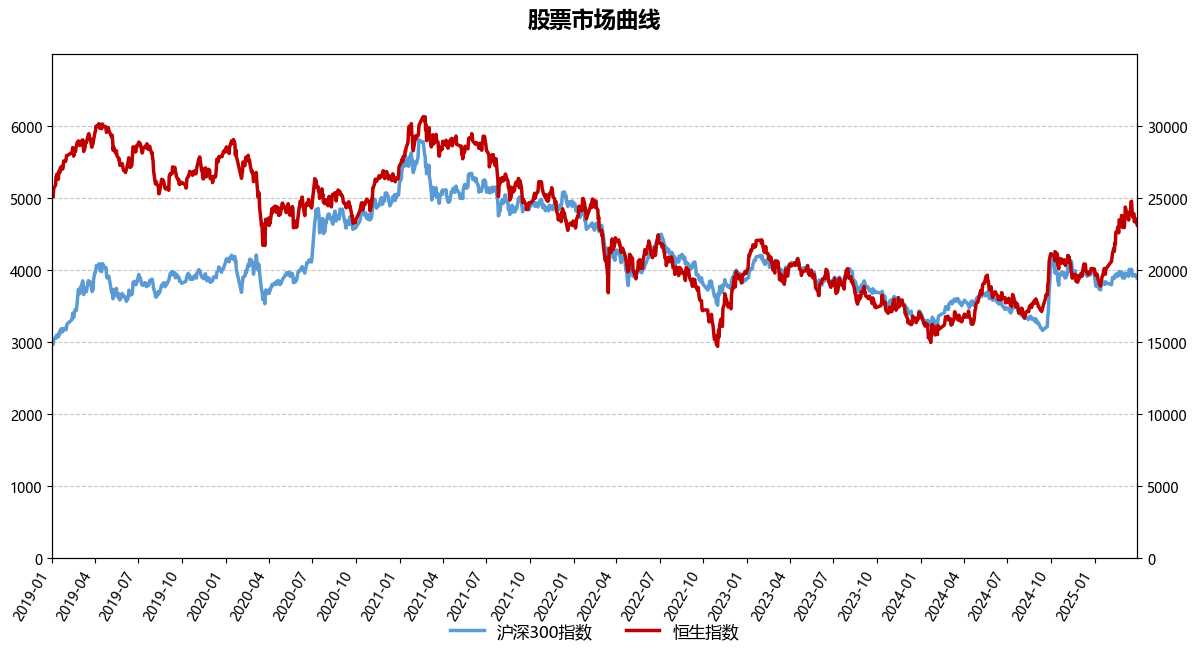

In [94]:
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 筛选2019年1月及之后的数据
fdf5['日期'] = pd.to_datetime(fdf5['日期'])  # 先将日期转换为datetime类型
df_filtered = fdf5[fdf5['日期'] >= '2019-01-01']

# 创建图形和坐标轴 - 使用subplots创建双Y轴
fig, ax1 = plt.subplots(figsize=(14, 8))

# 定义颜色
hs300_color = '#5B9BD5'  # 沪深300指数颜色（蓝色）
hsi_color = '#C00000'    # 恒生指数颜色（红色）

# 绘制沪深300指数 - 左侧Y轴
ax1.plot(df_filtered['日期'], df_filtered['沪深300指数'], 
         label='沪深300指数', 
         color=hs300_color,
         linewidth=2.5)

# 设置左侧Y轴（沪深300）
ax1.set_ylabel('', fontsize=12)
ax1.tick_params(axis='y')
ax1.set_ylim(0, 7000)
ax1.set_yticks(range(0, 7000, 1000))

# 创建右侧Y轴（恒生指数）
ax2 = ax1.twinx()

# 绘制恒生指数 - 右侧Y轴
ax2.plot(df_filtered['日期'], df_filtered['恒生指数'], 
         label='恒生指数', 
         color=hsi_color,
         linewidth=2.5)

# 设置右侧Y轴（恒生指数）
ax2.set_ylabel('', fontsize=12)
ax2.tick_params(axis='y')
ax2.set_ylim(0, 35000)
ax2.set_yticks(range(0, 35000, 5000))

# 设置标题
plt.title('股票市场曲线', fontsize=16, fontweight='bold', pad=20)

# 优化X轴日期显示
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式为年-月
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每3个月显示一个刻度

# 设置X轴标签旋转60度 - 关键修复
for label in ax1.get_xticklabels():
    label.set_rotation(60)
    label.set_ha('right')

# 添加横向网格线（只保留横线） - 只显示左侧Y轴的网格
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# 设置X轴范围
ax1.set_xlim(pd.Timestamp('2019-01-01'), df_filtered['日期'].max())

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.1), 
          ncol=2, 
          fontsize=12, 
          frameon=False)

# 调整布局确保图例可见
plt.subplots_adjust(bottom=0.25)  # 增加底部空间以容纳旋转的标签

# 显示图形
plt.show()
plt.show()

In [96]:
target_fdata5 = fdf5[fdf5['日期'] == end_date2]
stockidx1 = target_fdata5['沪深300指数'].values[0]
stockidx2 = target_fdata5['上证综合指数'].values[0]
stockidx3 = target_fdata5['恒生指数'].values[0]

formatted_stockidx1 = format(stockidx1, ".2f")
formatted_stockidx2 = format(stockidx2, ".2f")
formatted_stockidx3 = format(stockidx3, ".2f")

In [98]:
last_target_fdata5 = fdf5[fdf5['日期'] == last_q_date2]

last_stockidx1 = last_target_fdata5['沪深300指数'].values[0]
last_stockidx2 = last_target_fdata5['上证综合指数'].values[0]
last_stockidx3 = last_target_fdata5['恒生指数'].values[0]

sub_stockidx1 = stockidx1-last_stockidx1
sub_stockidx2 = stockidx2-last_stockidx2
sub_stockidx3 = stockidx3-last_stockidx3
formatted_sub_stockidx1 = format(sub_stockidx1, ".2f")
formatted_sub_stockidx2 = format(sub_stockidx2, ".2f")
formatted_sub_stockidx3 = format(sub_stockidx3, ".2f")

sub_pct_stockidx1 = (stockidx1-last_stockidx1)/last_stockidx1*100
sub_pct_stockidx2 = (stockidx2-last_stockidx2)/last_stockidx2*100
sub_pct_stockidx3 = (stockidx3-last_stockidx3)/last_stockidx3*100
formatted_sub_pct_stockidx1 = format(sub_pct_stockidx1, ".2f")
formatted_sub_pct_stockidx2 = format(sub_pct_stockidx2, ".2f")
formatted_sub_pct_stockidx3 = format(sub_pct_stockidx3, ".2f")


print(f"{end_date}的沪深指数{formatted_stockidx1}点,较上季度末上升 {formatted_sub_stockidx1}点，涨幅为{formatted_sub_pct_stockidx1}%")
print(f"{end_date}的上证综合指数{formatted_stockidx2}点,较上季度末上升 {formatted_sub_stockidx2}点，涨幅为{formatted_sub_pct_stockidx2}%")
print(f"{end_date}的恒生指数{formatted_stockidx3}点,较上季度末上升 {formatted_sub_stockidx3}点，涨幅为{formatted_sub_pct_stockidx3}%")

20250331的沪深指数3887.31点,较上季度末上升 -47.61点，涨幅为-1.21%
20250331的上证综合指数3335.75点,较上季度末上升 -16.02点，涨幅为-0.48%
20250331的恒生指数23119.58点,较上季度末上升 3059.63点，涨幅为15.25%


In [100]:
# 输出为excel
with pd.ExcelWriter("金融市场数据.xlsx") as writer1:
    fdf1.to_excel(writer1, sheet_name='无风险收益率-5、10年期国债到期收益率-画图', index=False)
    fdf2.to_excel(writer1, sheet_name='无风险收益率-1、3、5、7、10年期国债到期收益率', index=False)
    fdf3.to_excel(writer1, sheet_name='国债总指数', index=False)
    fdf4.to_excel(writer1, sheet_name='20年期国债即期-全量', index=False)
    fdf5.to_excel(writer1, sheet_name='股票指数-画图', index=False)